In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.linear_model import LogisticRegression

# The origin of sigmoid function.
## What are the ratio odds and log odd ?

<h7>
    <font color='#255e5c'>
    First we will generate the data which we use in our investigation and explanation.
    The main purpose of Logistic regression is to find the best coefficients of linear equation in form $\Theta(X)=x_i\theta_i + \theta_0$ in order to produce best fitting result when we pass this equation to sigmoid function.
   <br> <br> Let our journey begin by the simple linear equation $\Theta(X) = 2*x_1+4*x_2 + b$ 
    </font>    
</h7> 

In [1]:
z_f = lambda x,y : 2*x+4*y


In [13]:
x = np.linspace(-5,5,100) #generate array in interval between [-5,5]
arr = np.dstack(np.meshgrid(x, x)).reshape(-1, 2) #generate cartesian product
coef= np.array([2,4])

<h7>
    <font color='#255e5c'>
     Every number $[-\infty:\infty]$ handled by sigmoid function is transformed to a number belongs to interval $[0,1]$, this properties makes the sigmoid function very convenient  for solving a binary classification problem
     </font>
</h5>    


In [14]:
arr.dot(coef.T) ### generate the arg for logistic regression dot product between data and  coefincien wich is a just a linear combination


array([-30.       , -29.7979798, -29.5959596, ...,  29.5959596,
        29.7979798,  30.       ])

In [15]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

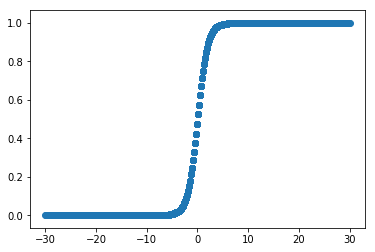

In [16]:
z = arr.dot(coef.T)
y= sigmoid(z)

plt.scatter(z,y)

<h7>
    <font color='#255e5c'>
     The above graphic is the sigmoid function  $$ h_{\Theta}(z)= h_{\Theta}(<X|\theta>)= \frac{1}{1+e^{-\vec{\theta}.\vec{X}}}=\frac{1}{1+e^{-\theta^T.X}}$$  where $z = 2*x_1+4*x_2 + b$
     </font>
</h7>    
 

### What is the origin of sigmoid function, From where the sigmoid come from ? 
###  Odds Ratio
<h7>
    <font color='#255e5c'>
    Odds ratio is is the probability to occur some event dividen to probability to not occur .Matematicaly written $$1) \; \; \; odds = \frac{P(A)}{1-P(A)} $$ because the probability to something not hapening is $1-P(A)$
    how loog like this function ,as we know that the $P(A)\in [0,1]$
    the function look like this 
    
</h7>

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


Text(0.5, 0, 'odds ration')

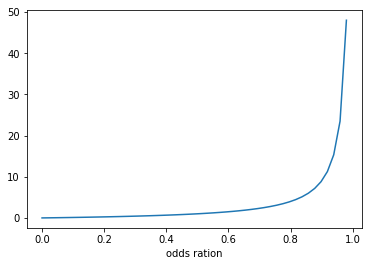

In [66]:
p = np.linspace(0,1)
odds = p/(1-p)
plt.plot(p,odds)
plt.xlabel("probability")
plt.xlabel("odds ration")

<h7>
    <font color='#255e5c'>  We can see from above graphic that a function is not symetric and the probability to something occur is between $[1,\infty]$ and to not occur $[0,1]$
<br> <br>
We can transform it in other function which basically will not change the meaning of data , the data just is transformed but but relation between elements of data remain the same. The transformed data are much more convenient for our future desired results.Basically, This is a mathematical convenienience. <br> <br>
This new function is called log odds function which is achieved by applying the $log$ to the both sides of eq(1), mathematically look like this : <br>  
    </font>
 </h7>
<h2>
<font color='#253cba'>

 $$ 2) \; \; log\Big(\frac{P(A)}{1-P(A)}\Big) $$ 
 
</font>
</h7>


Text(0.5, 0, 'log odds')

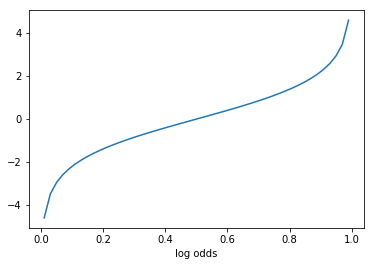

In [17]:
p = np.linspace(0.01,0.99)
odds = p/(1-p)
plt.plot(p,np.log(odds))
plt.xlabel("probability")
plt.xlabel("log odds")


<h7>
    <font color='#255e5c'>
        The main important fact of above graphics is that the log-odds varies between $[-\infty:\infty]$.
        This fact make it the convininet to be use for a fiting with given data withod limnit.
        The main point of logistic regression begin with the assumption of that : 
    <font>
 </h7>     
<h2>
<font color='#253cba'>
     $$ 3) \; \; log(\frac{p}{1-p}) = \beta_i x_i +a  $$ 
  <font>
</h2>            

<h7>
    <font color='#255e5c'>
     The both sides of equation (3)  If we raise up on exponent.
    </font>
</h7>  



<h2>
<font color='#253cba'>
$\;\;\;\;e^{log(\frac{p}{1-p})} = e^{\beta_i x_i +a} \; $ 
<br> <br>
$\;\;\;\; \iff \frac{p}{1-p} = e^{\beta_i x_i +a} $
<br> <br>
$ \;\;\;\; \iff p = e^{\beta_i x_i +a}(1-p) \;  $
<br> <br>
$\;\;\;\; \iff p = e^{\beta_i x_i +a} + -p.e^{\beta_i x_i +a}  \;  $
<br> <br>
$\;\;\;\; \iff p(1 +e^{\beta_i x_i +a}  ) = e^{\beta_i x_i +a}  \; $
<br> <br>
$\;\;\;\; \iff p= \frac{e^{\beta_i x_i +a}}{(1 +e^{\beta_i x_i +a}  ) }  \;  $
<br> <br>
$\;\;\;\; \iff p= \frac{ (e^{\beta_i x_i +a})e^{-(\beta_i x_i +a}) }{(1 +e^{\beta_i x_i +a}  )e^{-(\beta_i x_i +a}) } $

<br> <br>
$\;\;\;\; \; \;\; \; \;\; \; \;\; \; \; = \frac{1}{1 +e^{-(\beta_i x_i +a)}  }  \; $
<br> <br>
$\;\;\;\; \iff p= \frac{1}{1 +e^{-z}  }  \;  \;  \; where\;  z=\beta_i x_i +a 
$<br> <br>
$\;\;\;\; \iff  (4) \; \; p= \frac{1}{1 +e^{-z}}  \;  \; \; \; \; \; $  
  </font>
</h2>   
<h7>
    <font color='#255e5c'>
     We successfully achieved the sigmoid by a suggestion of $log-odds$ represent a linear function (basically that is the starting point of binary logistic regresssion) following by basics algebraic manipulation over it.Since there is a linear equation in our supposing ,this makes it enough simple in optimization process intending to fit the estimators according to given data, or just using for machine learning classification problem. The estimator  is a vector :  $$z=x_n\theta_n+ ...x_1+\theta_1 +\theta_0$$ .
     <br>
        In addition we can see the sigmoid functi with different estimators :   
        
   </font>
</h7>          

In [23]:
def cartesian(start,end,step):
    x = y = np.linspace(start,end,step)
    result = np.transpose([np.tile(x, len(y)), np.repeat(y, len(x))])
            
    return result  
def sigmoid(x,a,b):
    z = [i*a +b for i in x]
    result = [1/(1+np.exp(-i)) for i in z ]
    return result
def plot(num):
    """
    
    """
    
    size = np.sqrt(num)  
    a = cartesian(1,100,num)
  
    x = np.linspace(-10,10,30)
    if not size.is_integer():
        raise ValueError("num must has precise  root of integer type ")
    size = int(size)
    fig, axs = plt.subplots(size, size,figsize=(25,25))    
    for i in range(size):
        for j in range(size):
            axs[i, j].set_title('a = {} ,b = {}'.format(i,j)  )
            y=sigmoid(x,i,j)
            axs[i, j].plot(x,y)

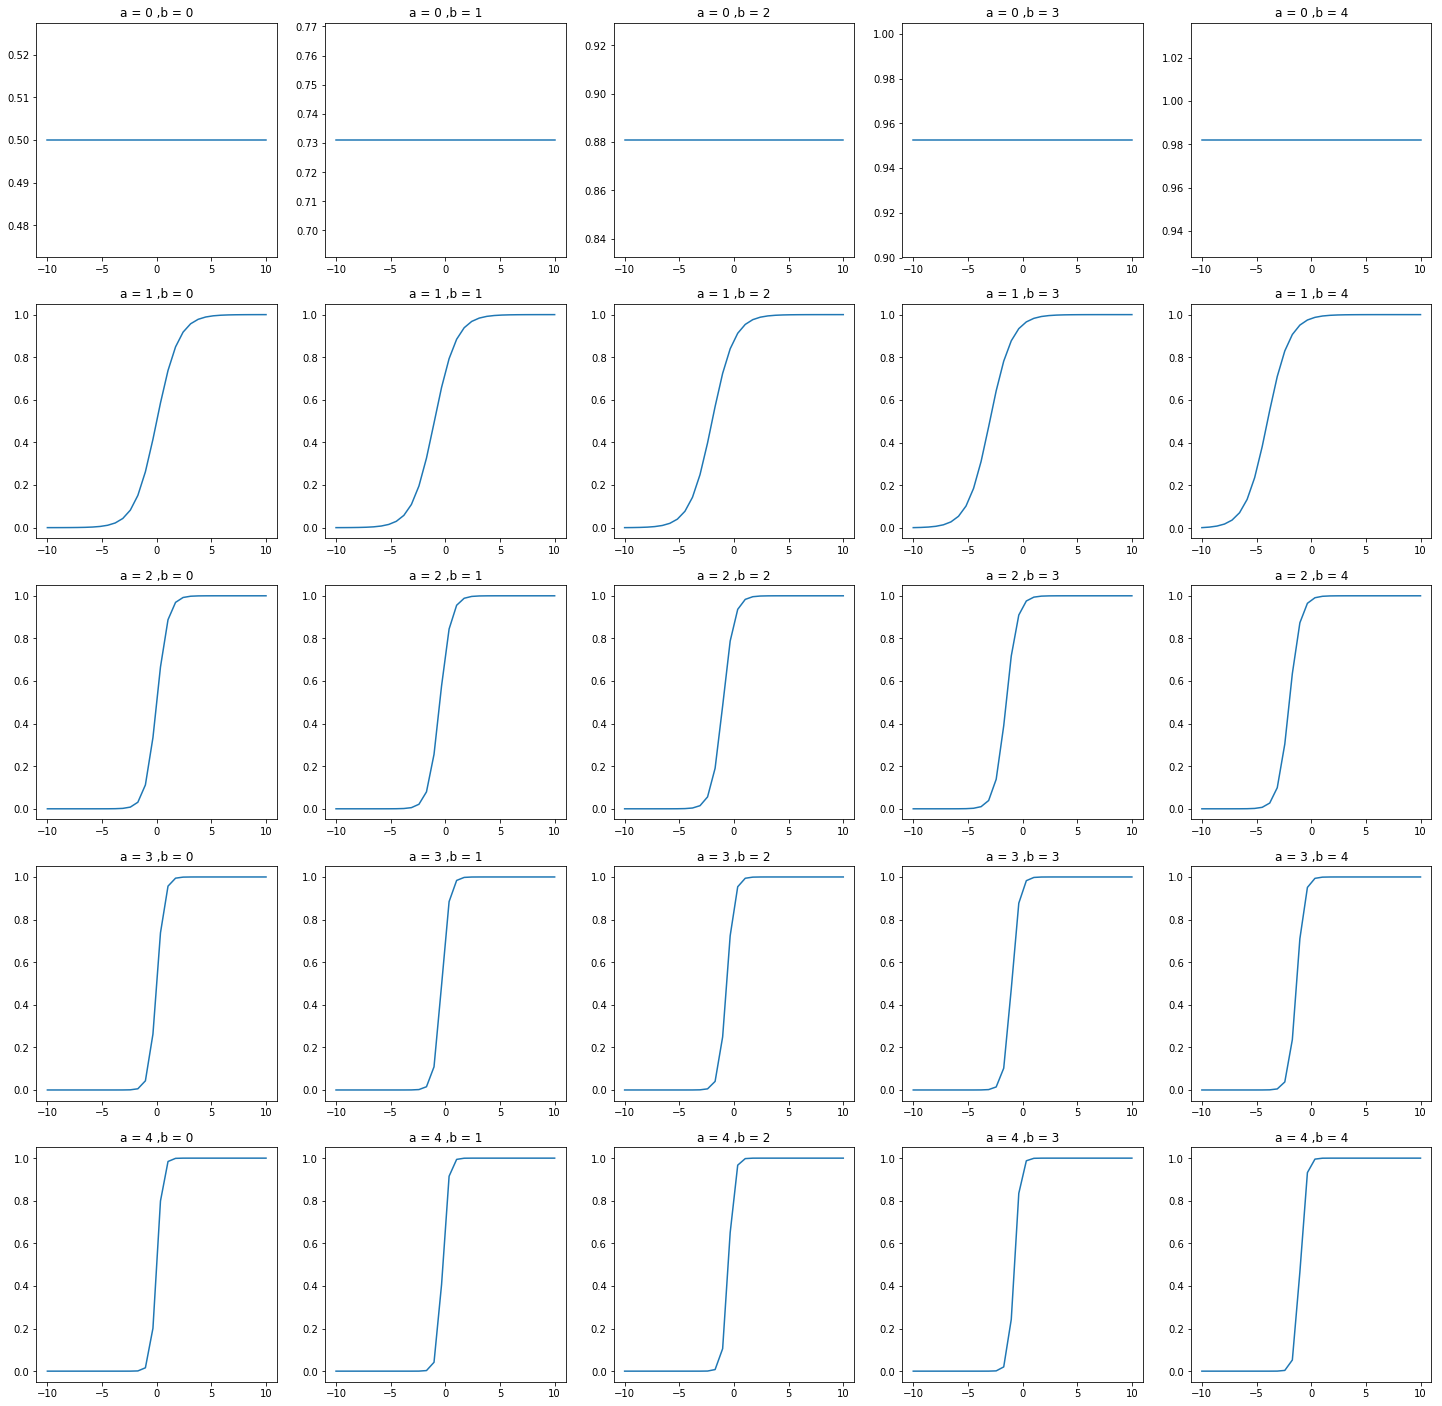

In [24]:
plot(25)